# Regression Model to Predict Average Price per Kilogram

This model's task is to predict the average price per kilogram and stock on hand for **Golden Delicious Apples**.

<img src="https://cdn.shopify.com/s/files/1/0271/7823/8041/products/golden-delicious-apple_2048x2048.jpg" alt="Golden Delicious Apples" title="Golden Delicious Apples" />

Providing an accurate and robust solution has immense economic potential, for users to be able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to, using a set of features (Weight, Low Price, High Price, etc.).


## Import Packages

Importing:
- numpy for mathemticial calculations
- pandas to read and store data as Data Frames
- seasborn and matplotlib for visualisations
- scikit learn for Regression Models, Model Selection, Pre-processing and Metrics
- scipy for Stats
- pickle to save the model

In [2]:
# Numpy and Pandas
import numpy as np
import pandas as pd

# Scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Extra Modules
from scipy import stats
import pickle

## Importing Data

In [112]:
train = pd.read_csv('df-train_set.csv')
test = pd.read_csv('df-test_set.csv')

## Checking Data

Firstly, we take a quick look at the data from our training set

In [4]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [113]:
train['Date'] = pd.to_datetime(train['Date'])
train['Day'] = train['Date'].dt.day
train['Month'] = train['Date'].dt.month
train.drop(['Date'], inplace = True, axis = 1)

In [114]:
train.shape

(64376, 14)

The data frame has 64376 rows and 14 columns

As shown above, it is easy to see what data type each column has but the **info** method can confirm that.

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Low_Price         64376 non-null  float64
 6   High_Price        64376 non-null  float64
 7   Sales_Total       64376 non-null  float64
 8   Total_Qty_Sold    64376 non-null  int64  
 9   Total_Kg_Sold     64376 non-null  float64
 10  Stock_On_Hand     64376 non-null  int64  
 11  avg_price_per_kg  64376 non-null  float64
 12  Day               64376 non-null  int64  
 13  Month             64376 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 6.9+ MB


The display of each column above was enough to show that none of the columns contains null or missing values. 

### Removing unneccessary features
Just by looking at the Data Frame, it seems that there are features that are not required. 
To start with, the model's focus is on the **Golden Delicious Apples**, therefore the other commodities could be filtered out. <br>
<br><br>
After filtering, we know that all rows are **Golden Delicious Apples** Commodities, therefore the **Commodities** feature is not required.

In [116]:
train = train.query('Commodities == "APPLE GOLDEN DELICIOUS"')
train.drop(['Commodities'], inplace = True, axis = 1)
train.head()

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,9
7,CAPE,JG110,2M,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,16,4
40,CAPE,M4183,1S,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5
69,EASTERN CAPE,IA400,1S,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,28,9


##### Everything looks good, now the dataset is ready to be explored 

## Exploratory Data Analysis

###  Univariate Analysis

#### Statistical Overview

In [8]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893,15.866291,5.609119
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744,8.705740,2.687248
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000,1.000000,1.000000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000,9.000000,3.000000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000,16.000000,6.000000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000,23.000000,7.000000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000,31.000000,12.000000


Below we will be calculating the **kurtosis** and **skew** to measure the presents of outliers and the distribution of our data respectively.
<br>
- If the skewness is between -0.5 and 0.5, the data is fairly symmetrical.
- If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data is moderately skewed.
- If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data is highly skewed

<br>
<img src = "https://miro.medium.com/max/600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg" alt = "Skewness" title = "Skewness"></img>
<br>

In [9]:
train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
Day                -0.021883
Month               0.078651
dtype: float64

The feature `Day` is fairly symmetrical; `avg_price_per_kg` and `Month` are moderately skewed in a positive direction; `Weight_Kg`, `Low_Price`, `High_Price`, `Sales_total`, `Total_Qty_Sold`, `Total_Kg_Sold` and `Stock_On_Hand` are highly skewed in the positive direction.

In [10]:
train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
Day                 -1.122178
Month               -0.620111
dtype: float64

Kurtosis indicates that `Weight_Kg`, `Low_Price`, `High_Price`, `Sales_total`, `Total_Qty_Sold`, `Total_Kg_Sold` and `Stock_On_Hand` has a fairly high measure of outliers present. While `Day`, `avg_price_per_kg` and `Month` indicates a lack of outliers.

#### Visualisation Overview

Visualisation of all numeric features

array([[<AxesSubplot:title={'center':'Weight_Kg'}>,
        <AxesSubplot:title={'center':'Low_Price'}>,
        <AxesSubplot:title={'center':'High_Price'}>],
       [<AxesSubplot:title={'center':'Sales_Total'}>,
        <AxesSubplot:title={'center':'Total_Qty_Sold'}>,
        <AxesSubplot:title={'center':'Total_Kg_Sold'}>],
       [<AxesSubplot:title={'center':'Stock_On_Hand'}>,
        <AxesSubplot:title={'center':'avg_price_per_kg'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

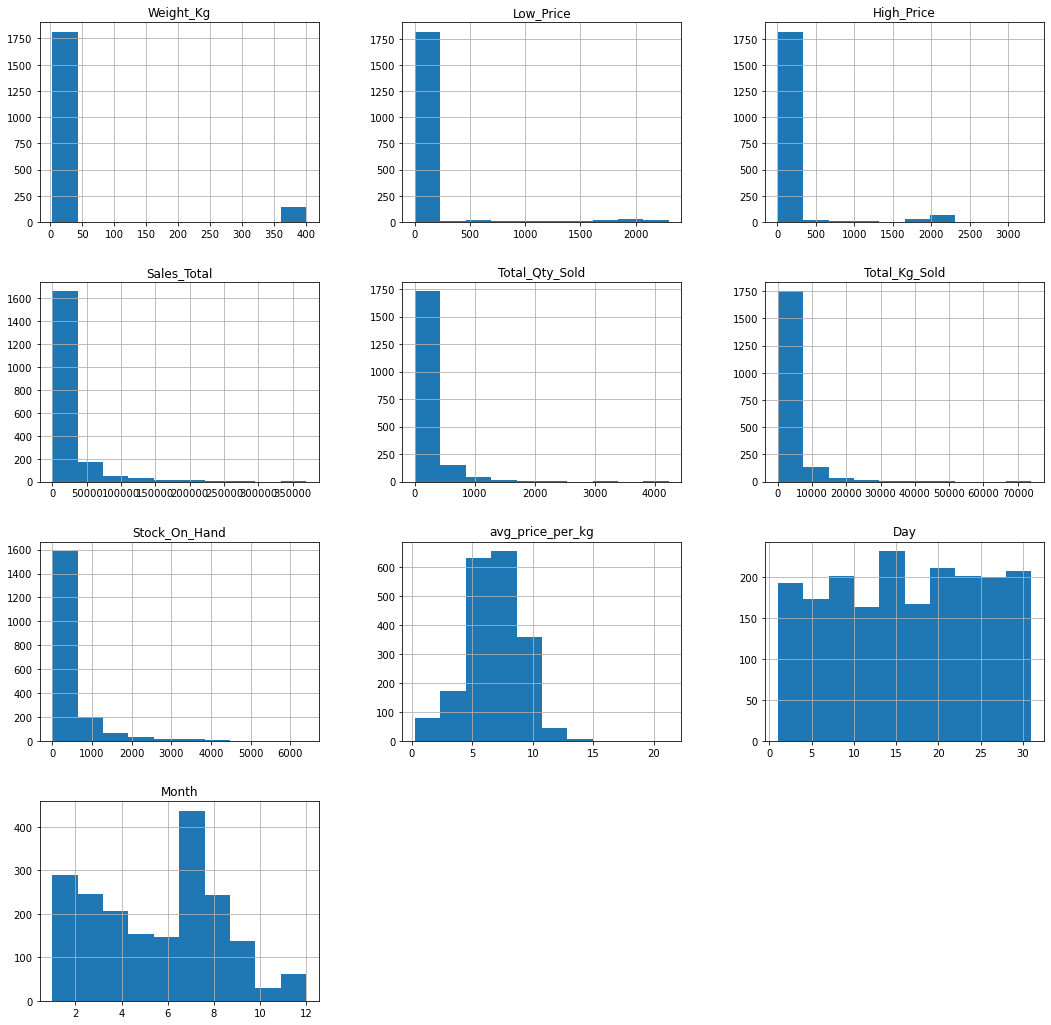

In [11]:
num_features = train.select_dtypes(include = ['int64', 'float64']).columns
train[num_features].hist(figsize = (18, 18))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

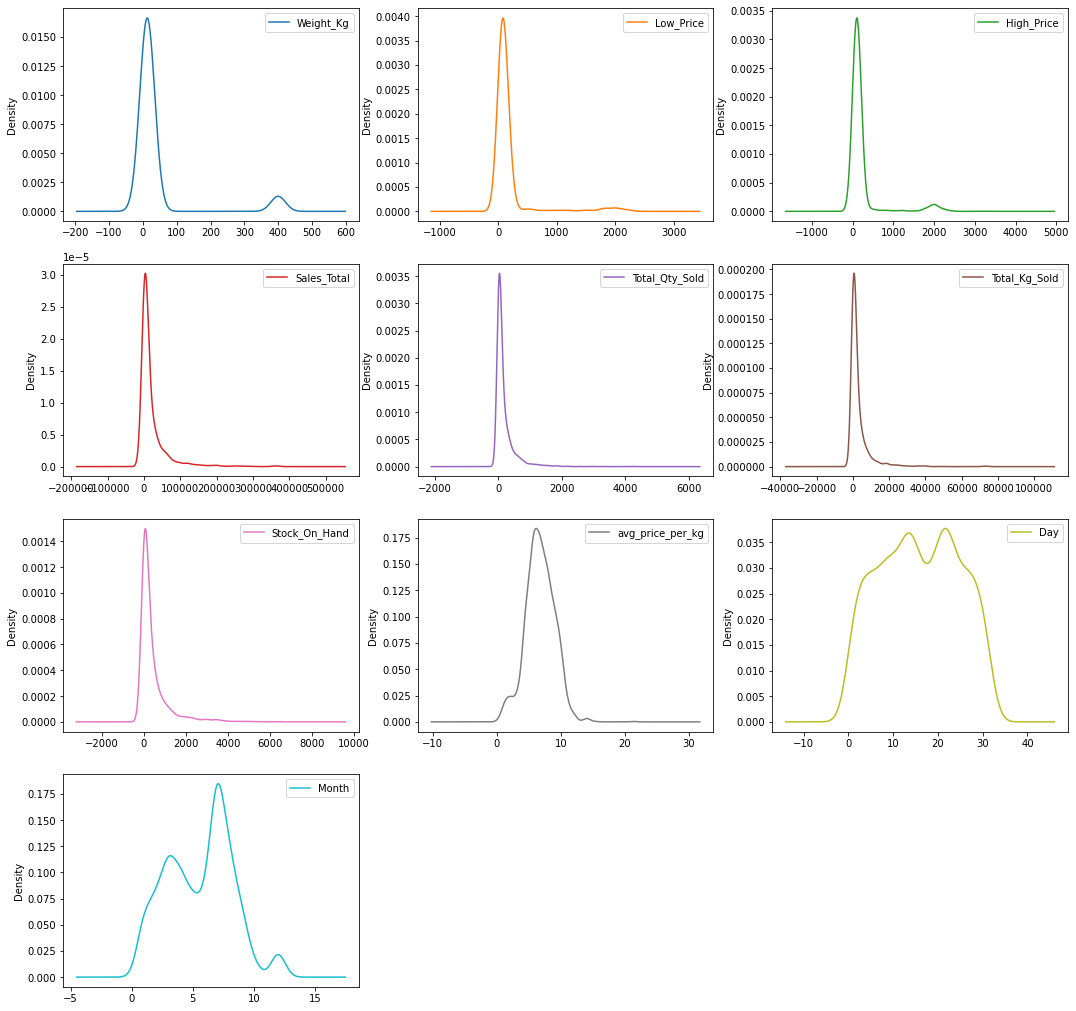

In [12]:
train[num_features].plot(kind = "density", subplots = True, layout = (4, 3), sharex = False, figsize = (18, 18))

Observing the histogram and density plot, it is clear that the same information is being display. It is just smoother version of the histogram.

As shown in the kurtosis, there are 7 features with outliers that lies far outside the range. Below is a graphical presentation of how far they actually are.

<AxesSubplot:xlabel='Stock_On_Hand'>

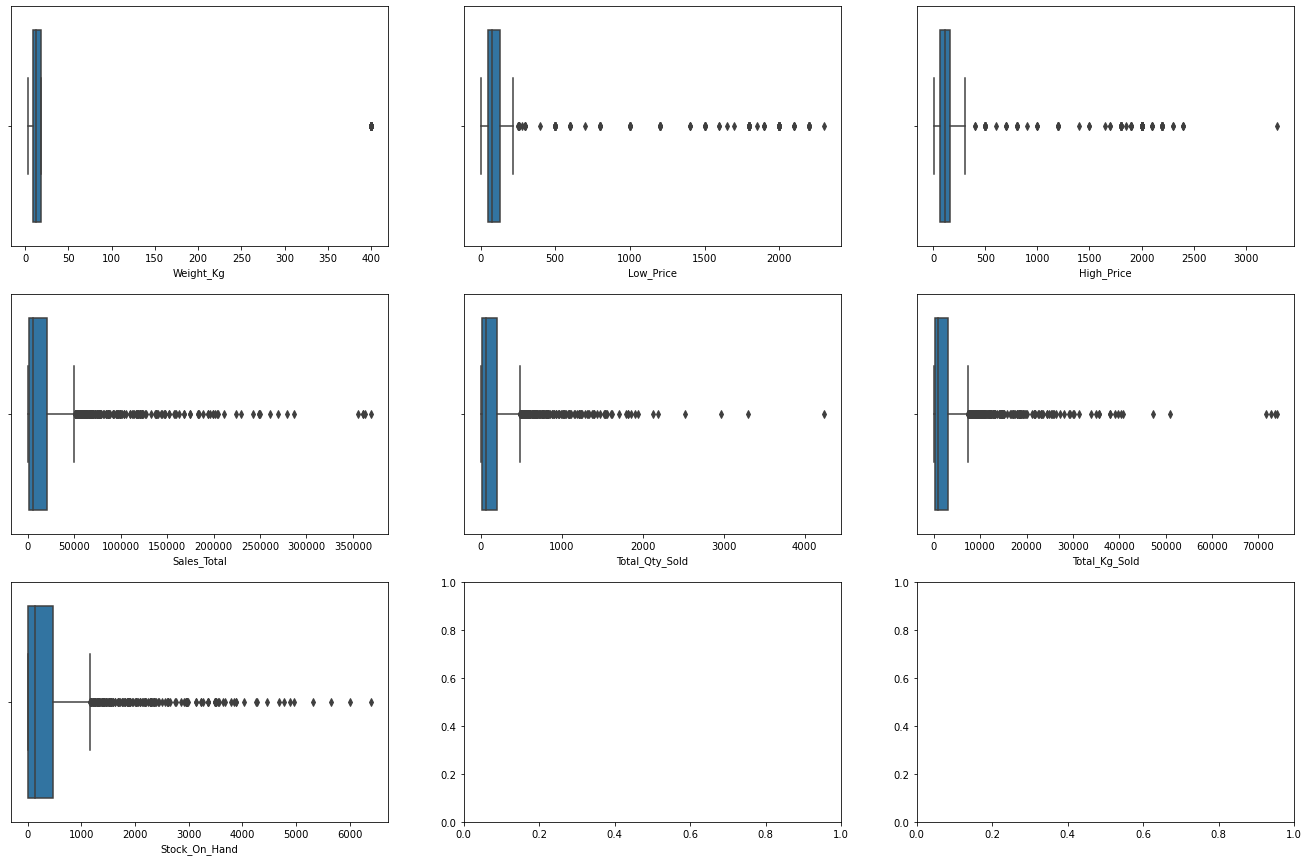

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(23, 15))
sns.boxplot(ax=ax[0, 0], data=train, x='Weight_Kg')
sns.boxplot(ax=ax[0, 1], data=train, x='Low_Price')
sns.boxplot(ax=ax[0, 2], data=train, x='High_Price')
sns.boxplot(ax=ax[1, 0], data=train, x='Sales_Total')
sns.boxplot(ax=ax[1, 1], data=train, x='Total_Qty_Sold')
sns.boxplot(ax=ax[1, 2], data=train, x='Total_Kg_Sold')
sns.boxplot(ax=ax[2, 0], data=train, x='Stock_On_Hand')

Next we will be looking at plots for all categorical features

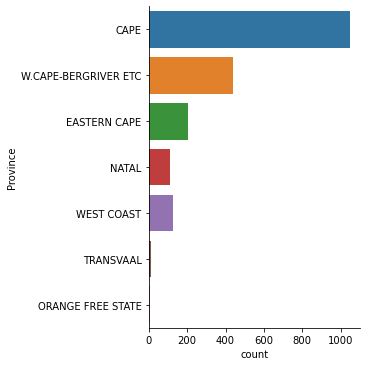

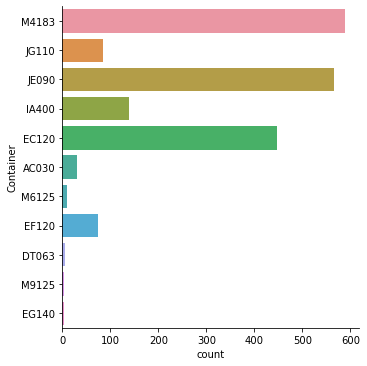

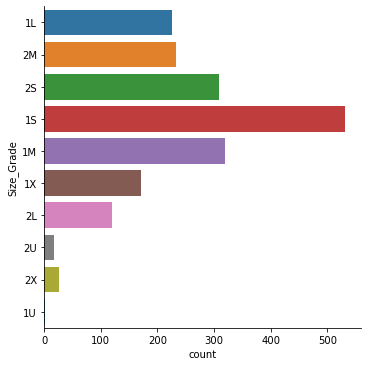

In [35]:
sns.catplot(y="Province", kind="count", data=train, orient ='v')
sns.catplot(y="Container", kind="count", data=train)
sns.catplot(y="Size_Grade", kind="count", data=train)

###  Multivariate Analysis

#### Statistical Overview

We use the `get_dummies()` method to transform our categorical data into numeric data by adding additional columns that represents each distinct category.

Below a `True` argument was passed into the `drop_first` parameter to create n - 1 categories for n categorical features.

In [117]:
df_train = pd.get_dummies(data = train, columns = ['Province', 'Container', 'Size_Grade'], drop_first = True)
df_train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,9,...,0,0,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4,...,0,0,0,0,0,0,1,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,16,4,...,0,0,0,0,0,0,0,1,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5,...,0,0,1,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,28,9,...,0,0,1,0,0,0,0,0,0,0


Using the Pearson correlation measure the linear relationship between features.

In [10]:
df_train.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886,0.016251,0.047613,...,-0.011011,-0.046532,0.314679,-0.007124,-0.068923,-0.080647,-0.083726,-0.064374,-0.029488,-0.036183
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740,-0.015764,0.039084,...,-0.009207,-0.023629,0.288148,-0.008087,-0.025554,-0.084578,-0.104532,-0.102040,-0.032675,-0.038494
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496,0.002058,0.047717,...,-0.011222,-0.039365,0.331683,-0.007067,-0.030418,-0.092192,-0.118314,-0.118517,-0.035822,-0.042342
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473,-0.011699,-0.055853,...,-0.012063,-0.057071,0.285465,-0.012618,-0.075793,-0.105784,-0.109908,-0.132595,-0.040623,-0.046104
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536,-0.020402,-0.058639,...,-0.010528,-0.061837,0.202586,-0.012138,-0.100508,-0.085270,-0.037270,-0.027759,-0.032337,-0.033339
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007,0.003238,-0.023098,...,-0.011677,-0.076261,0.306478,-0.010024,-0.081291,-0.097158,-0.093815,-0.100862,-0.035961,-0.041667
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028,0.081923,-0.011749,...,-0.022123,-0.028461,0.171355,-0.015715,-0.044300,-0.086927,-0.086702,-0.008891,-0.046085,-0.005271
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000,-0.071334,0.005205,...,0.002812,0.175779,-0.028506,-0.027335,0.251451,-0.089733,-0.153372,-0.352996,-0.069457,-0.051624
Day,0.016251,-0.015764,0.002058,-0.011699,-0.020402,0.003238,0.081923,-0.071334,1.000000,0.010012,...,-0.011418,-0.001329,0.028307,0.009691,-0.030633,0.014469,-0.029280,0.035713,0.019178,-0.026454
Month,0.047613,0.039084,0.047717,-0.055853,-0.058639,-0.023098,-0.011749,0.005205,0.010012,1.000000,...,-0.018631,-0.023882,0.035952,-0.007261,-0.064184,0.067404,0.012777,-0.022811,-0.047931,0.013578


-------------------------------------------------------------------------------------------------------------------

In [12]:
df_train['Price'] = (df_train['High_Price'] + df_train['Low_Price']) / 2
df_train.drop(['Low_Price', 'High_Price'], inplace = True, axis = 1)

In [13]:
df_train.corr()

,Weight_Kg,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month,Province_EASTERN CAPE,Province_NATAL,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Price
Weight_Kg,1.000000,0.180518,-0.133317,0.294117,-0.144105,-0.337886,0.016251,0.047613,-0.082671,0.182454,...,-0.046532,0.314679,-0.007124,-0.068923,-0.080647,-0.083726,-0.064374,-0.029488,-0.036183,0.900054
Sales_Total,0.180518,1.000000,0.771865,0.962338,0.284693,0.108473,-0.011699,-0.055853,-0.153576,-0.088184,...,-0.057071,0.285465,-0.012618,-0.075793,-0.105784,-0.109908,-0.132595,-0.040623,-0.046104,0.231097
Total_Qty_Sold,-0.133317,0.771865,1.000000,0.651440,0.390168,0.087536,-0.020402,-0.058639,-0.144064,-0.091620,...,-0.061837,0.202586,-0.012138,-0.100508,-0.085270,-0.037270,-0.027759,-0.032337,-0.033339,-0.110370
Total_Kg_Sold,0.294117,0.962338,0.651440,1.000000,0.229062,-0.001007,0.003238,-0.023098,-0.139492,-0.060972,...,-0.076261,0.306478,-0.010024,-0.081291,-0.097158,-0.093815,-0.100862,-0.035961,-0.041667,0.329938
Stock_On_Hand,-0.144105,0.284693,0.390168,0.229062,1.000000,0.105028,0.081923,-0.011749,-0.140210,-0.135137,...,-0.028461,0.171355,-0.015715,-0.044300,-0.086927,-0.086702,-0.008891,-0.046085,-0.005271,-0.111407
avg_price_per_kg,-0.337886,0.108473,0.087536,-0.001007,0.105028,1.000000,-0.071334,0.005205,-0.178531,-0.379801,...,0.175779,-0.028506,-0.027335,0.251451,-0.089733,-0.153372,-0.352996,-0.069457,-0.051624,-0.156388
Day,0.016251,-0.011699,-0.020402,0.003238,0.081923,-0.071334,1.000000,0.010012,0.022327,0.035035,...,-0.001329,0.028307,0.009691,-0.030633,0.014469,-0.029280,0.035713,0.019178,-0.026454,-0.006288
Month,0.047613,-0.055853,-0.058639,-0.023098,-0.011749,0.005205,0.010012,1.000000,-0.004021,0.064545,...,-0.023882,0.035952,-0.007261,-0.064184,0.067404,0.012777,-0.022811,-0.047931,0.013578,0.044410
Province_EASTERN CAPE,-0.082671,-0.153576,-0.144064,-0.139492,-0.140210,-0.178531,0.022327,-0.004021,1.000000,-0.084342,...,0.060135,-0.011771,-0.011000,-0.094638,0.057867,0.157235,-0.048046,-0.032196,-0.039909,-0.093414
Province_NATAL,0.182454,-0.088184,-0.091620,-0.060972,-0.135137,-0.379801,0.035035,0.064545,-0.084342,1.000000,...,-0.042716,0.048429,-0.007864,-0.076085,-0.062844,-0.056002,0.221405,-0.023015,-0.028529,0.018454


--------------

#### Visualisation Overview

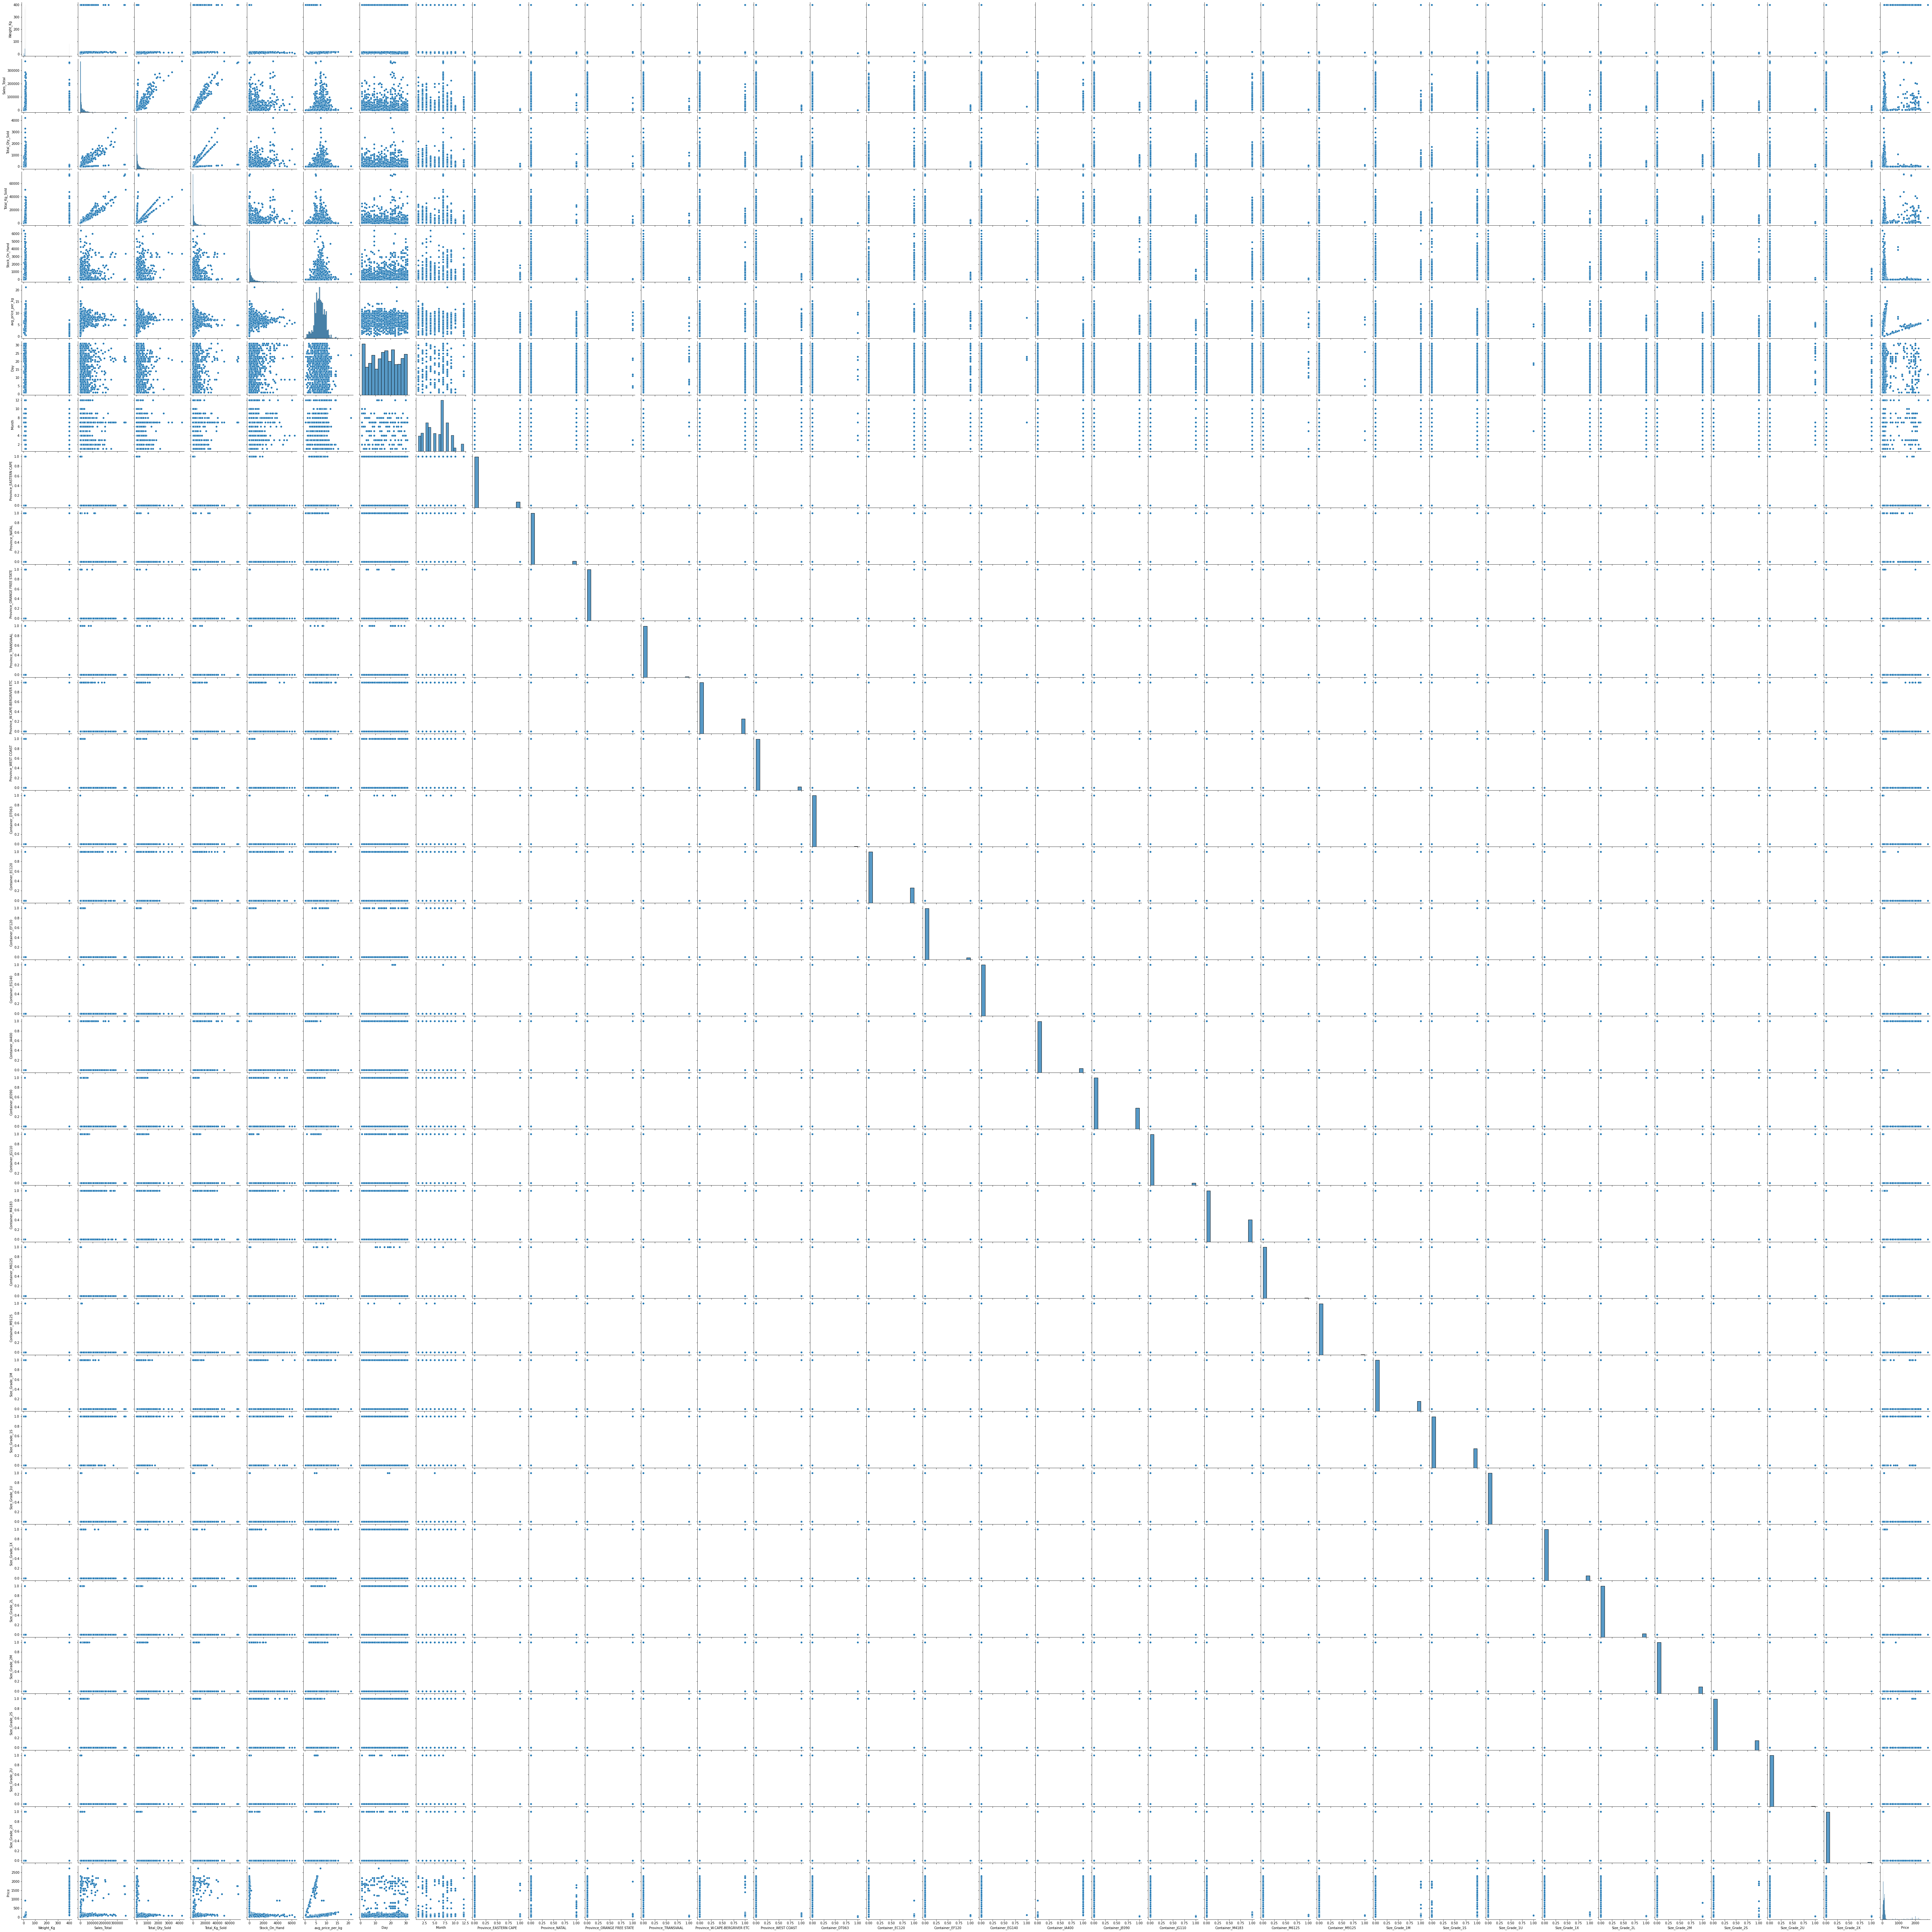

In [111]:
sns.pairplot(df_train)

## Model Building

In [118]:
# Defining Functions for ease of quick calculations
def r_squared(y, y_pred):
    return r2_score(y, y_pred)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def mse(y, y_pred):
    return mean_squared_error(y, y_pred)

### Linear Regression


In [119]:
x = df_train.drop(['avg_price_per_kg'], axis = 1)
y = df_train['avg_price_per_kg']

In [120]:
lr = LinearRegression()

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                   y,
                                                   test_size = 0.20,
                                                   random_state = 1)

In [122]:
lr.fit(x_train, y_train)

LinearRegression()

In [123]:
intercept_lr = float(lr.intercept_)

In [124]:
print(intercept_lr)

2798757.2748124218


In [125]:
df_lr_coef = pd.DataFrame(lr.coef_, x.columns, columns = ['Coefficients'])

In [126]:
df_lr_coef

,Coefficients
Weight_Kg,-9.329168e+05
Low_Price,5.591734e-04
High_Price,1.430061e-03
Sales_Total,7.096453e-05
Total_Qty_Sold,-2.267832e-03
Total_Kg_Sold,-3.650477e-04
Stock_On_Hand,-1.228134e-04
Day,-4.980894e-03
Month,5.815086e-02
Province_EASTERN CAPE,-1.504833e+00


In [127]:
results_dict = {'Training MSE': [mse(y_train, lr.predict(x_train))],
                'Training RMSE': [rmse(y_train, lr.predict(x_train))],
                'Test MSE': [mse(y_test, lr.predict(x_test))],
                'Test RMSE': [rmse(y_test, lr.predict(x_test))],
                'Train R2': [r_squared(y_train, lr.predict(x_train))],
                'Test R2': [r_squared(y_test, lr.predict(x_test))]
                }

In [128]:
results_df = pd.DataFrame(results_dict)

In [129]:
results_df


,Training MSE,Training RMSE,Test MSE,Test RMSE,Train R2,Test R2
0,2.039273,1.428031,1.589225,1.260645,0.607921,0.643842


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Lasso Regression

In [76]:
scalar = StandardScaler()

In [77]:
x_scaled = scalar.fit_transform(x)

In [78]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_scaled,
                                                       y,
                                                       test_size = 0.20,
                                                       random_state = 1,
                                                       shuffle = False)

In [79]:
lasso = Lasso(alpha = 0.01)

In [80]:
lasso.fit(x_train2, y_train2)

C:\Users\Morgan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5626030770963553, tolerance: 0.7765610855349135
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [81]:
lasso_intercept = float(lasso.intercept_)
print(lasso_intercept)

6.803246968388469


In [82]:
lasso_coeff = pd.DataFrame(lasso.coef_, x.columns, columns=['Coefficient'])

In [83]:
lasso_coeff

,Coefficient
Weight_Kg,-0.238931
Sales_Total,2.197224
Total_Qty_Sold,-0.568480
Total_Kg_Sold,-1.692431
Stock_On_Hand,-0.049772
Day,-0.068820
Month,0.138223
Province_EASTERN CAPE,-0.426947
Province_NATAL,-0.465325
Province_ORANGE FREE STATE,-0.101361


In [84]:
lasso_y_pred_train = lasso.predict(x_train2)

In [85]:
lasso_y_pred_test = lasso.predict(x_test2)

In [101]:
results_dict_lasso = {"LASSO Train (MSE)": [mse(y_train2, lasso_y_pred_train)],
                "LASSO Test (MSE)": [mse(y_test2, lasso_y_pred_test)],
                "LASSO Train (RMSE)": [rmse(y_train2, lasso_y_pred_train)],
                "LASSO Test (RMSE)": [rmse(y_test2, lasso_y_pred_test)],
                "LASSO Train (R-Square)": [r_squared(y_train2, lasso_y_pred_train)],
                "LASSO Test (R-Square)": [r_squared(y_test2, lasso_y_pred_test)]
                }

In [102]:
lasso_results = pd.DataFrame(results_dict_lasso)

In [103]:
lasso_results

,LASSO Train (MSE),LASSO Test (MSE),LASSO Train (RMSE),LASSO Test (RMSE),LASSO Train (R-Square),LASSO Test (R-Square)
0,1.936163,2.124919,1.391461,1.45771,0.610803,0.602133


-------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Ridge Regression

In [52]:
ridge_scalar = StandardScaler()

In [54]:
ridge_x_scaled = ridge_scalar.fit_transform(x)

In [55]:
x_standardize = pd.DataFrame(ridge_x_scaled, columns = x.columns)
x_standardize.head()

,Weight_Kg,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Day,Month,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Price
0,-0.222433,0.811807,0.510117,0.511073,0.571070,-0.788911,1.262165,-0.343488,-0.245547,-0.068059,...,-0.44198,-0.612085,-0.032026,-0.30986,-0.255934,-0.367265,-0.432837,-0.093731,-0.116187,-0.088062
1,-0.295704,-0.103950,0.471248,0.091837,-0.563874,-0.214430,-0.598952,-0.343488,-0.245547,-0.068059,...,-0.44198,-0.612085,-0.032026,-0.30986,-0.255934,2.722828,-0.432837,-0.093731,-0.116187,-0.365006
2,-0.315779,-0.488870,-0.506948,-0.459029,1.515476,0.015363,-0.598952,-0.343488,-0.245547,-0.068059,...,-0.44198,-0.612085,-0.032026,-0.30986,-0.255934,-0.367265,2.310338,-0.093731,-0.116187,-0.352417
3,-0.222433,0.306871,0.691504,0.679187,0.047781,-1.363392,-0.226728,-0.343488,-0.245547,-0.068059,...,-0.44198,1.633760,-0.032026,-0.30986,-0.255934,-0.367265,-0.432837,-0.093731,-0.116187,-0.239122
4,3.608756,-0.468098,-0.562012,-0.419986,-0.561112,1.394117,1.262165,2.911310,-0.245547,-0.068059,...,-0.44198,1.633760,-0.032026,-0.30986,-0.255934,-0.367265,-0.432837,-0.093731,-0.116187,4.040911


In [56]:
x_train_ridge, x_test_ridge, y_train_ridge, y_test_ridge = train_test_split(x_standardize, 
                                                                            y, 
                                                                            test_size=0.2, 
                                                                            random_state = 1)

In [57]:
ridge = Ridge()

In [58]:
ridge.fit(x_train_ridge, y_train_ridge)

Ridge()

In [131]:
ridge_intercept = float(ridge.intercept_)
print("Intercept:", float(ridge_intercept))

Intercept: 6.80247348279907


In [61]:
coeff = pd.DataFrame(ridge.coef_, x.columns, columns=['Coefficient'])
coeff

,Coefficient
Weight_Kg,-0.549112
Sales_Total,2.649653
Total_Qty_Sold,-0.691434
Total_Kg_Sold,-2.096417
Stock_On_Hand,-0.084417
Day,-0.043116
Month,0.155462
Province_EASTERN CAPE,-0.463782
Province_NATAL,-0.440869
Province_ORANGE FREE STATE,-0.130264


In [62]:
y_pred_train_ridge = ridge.predict(x_train_ridge)
y_pred_test_ridge = ridge.predict(x_test_ridge)

In [104]:
results_dict_ridge = {"Ridge Train (MSE)": [mse(y_train_ridge, y_pred_train_ridge)],
                "Ridge Test (MSE)": [mse(y_test_ridge, y_pred_test_ridge)],
                "Ridge Train (RMSE)": [rmse(y_train_ridge, y_pred_train_ridge)],
                "Ridge Test (RMSE)": [rmse(y_test_ridge, y_pred_test_ridge)],
                "Ridge Train (R-Square)": [r_squared(y_train_ridge, y_pred_train_ridge)],
                "Ridge Test (R-Square)": [r_squared(y_test_ridge, y_pred_test_ridge)]
                }

In [105]:
ridge_results = pd.DataFrame(results_dict_ridge)

In [106]:
ridge_results

,Ridge Train (MSE),Ridge Test (MSE),Ridge Train (RMSE),Ridge Test (RMSE),Ridge Train (R-Square),Ridge Test (R-Square)
0,2.042592,1.602407,1.429193,1.265862,0.607283,0.640887


## Model Deployment

#### Saving Model

In [130]:
model_path = "model_file.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(lr, file)

#### Pre-processing on Test set

In [39]:
test['Date'] = pd.to_datetime(test['Date'])
test['Day'] = test['Date'].dt.day
test['Month'] = test['Date'].dt.month
test.drop(['Date'], inplace = True, axis = 1)

In [40]:
df_test = pd.get_dummies(data = test, columns = ['Province', 'Container', 'Size_Grade'], drop_first = True)

In [41]:
df_test.drop(['Commodities', 'Index'], axis = 1)

In [42]:
x_test_set.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Day,Month,Province_EASTERN CAPE,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,12.0,128.0,136.0,5008.0,38,456.0,0,9,7,0,...,0,1,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,20,1,0,...,0,0,0,0,1,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,19,8,0,...,0,0,1,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,6,5,0,...,0,1,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,4,5,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
x_test_set['Price'] = (x_test_set['High_Price'] + x_test_set['Low_Price']) / 2
x_test_set.drop(['Low_Price', 'High_Price'], axis = 1)

In [109]:
y_pred_test_set = lr.predict(x_test_set)

In [110]:
y_pred_test_set


array([ 8.88537583,  8.77762748,  8.41052365,  7.97787013,  8.5546056 ,
        4.94784229,  5.23138007,  7.77273076,  8.96755291,  8.85670564,
        6.44279264,  6.94137042,  8.31230838,  5.29174163,  3.44480924,
        6.73201381,  7.89645502,  5.12509222,  9.72900389,  6.00866071,
        5.68864807,  5.30838916,  6.16799711,  6.58759517,  4.93829747,
        6.81908791,  7.80086457,  8.30922446,  8.44229967,  7.93100024,
        8.71284068,  4.99556507,  9.25666301,  7.42944428,  3.42457544,
        8.75720201,  8.24864386,  9.46191897,  5.65227404,  6.61283779,
        8.43816298,  8.5968748 ,  8.89487728,  5.17941501,  6.17672657,
        6.16121855,  3.55650685,  6.41145934,  6.40267914,  1.87298238,
        0.72896032,  4.74099003,  8.77880952,  9.14642404,  7.77445143,
        6.95372982,  8.08343429,  9.43031412,  8.78029187,  8.57952044,
        8.98198134,  9.38179962,  4.98827948,  7.93640787,  7.89779889,
        5.59576807,  5.04084922,  4.78882547,  6.29902848,  6.45

#### Export Predict to csv file

In [48]:
index_len = [x + 1 for x in range(len(y_pred_test_set))]

In [49]:
submit = pd.DataFrame({'Index': index_len,
                     'avg_price_per_kg': y_pred_test_set})

In [50]:
submit.head()

,Index,avg_price_per_kg
0,1,8.885376
1,2,8.777627
2,3,8.410524
3,4,7.977870
4,5,8.554606


In [51]:
submit.to_csv('submit_set.csv', index = False)